In [1]:
import os.path as osp
import numpy as np
import torch, base64, io, json, math
from icecream import ic
from pydantic import BaseModel
from PIL import Image

from transformers import Qwen2_5_VLForConditionalGeneration, AutoProcessor
from pav_agent.pav_agents import Planner, Actor, Verifier, agent_preprocess

# model_path3 = "Qwen/Qwen2.5-VL-3B-Instruct"
model_path7 = "Qwen/Qwen2.5-VL-7B-Instruct"
# model3 = Qwen2_5_VLForConditionalGeneration.from_pretrained(model_path3, torch_dtype=torch.bfloat16, attn_implementation="flash_attention_2",device_map="auto")
model = Qwen2_5_VLForConditionalGeneration.from_pretrained(model_path7, torch_dtype=torch.bfloat16, attn_implementation="flash_attention_2",device_map="auto")
processor = AutoProcessor.from_pretrained(model_path7)

plan = Planner()
act = Actor()
verify = Verifier()

/home/cyoh/anaconda3/envs/pav/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


['{"macro-actions": "select", "arguments": {"button": "Done"}}', '{"macro-actions": "terminate", "arguments": {"status": "Done_Actions"}}']
{"macro-actions": "select", "arguments": {"button": "Done"}}
{"macro-actions": "terminate", "arguments": {"status": "Done_Actions"}}
action :  {'macro-actions': 'select', 'arguments': {'button': 'Done'}}
action :  {'macro-actions': 'terminate', 'arguments': {'status': 'Done_Actions'}}
macro_action_plan :  ['select Done', 'Done_Actions']
output :  <tool_call>
{"name": "actor_use", "arguments": {"action": "click", "coordinate": [578, 397]}}
</tool_call>


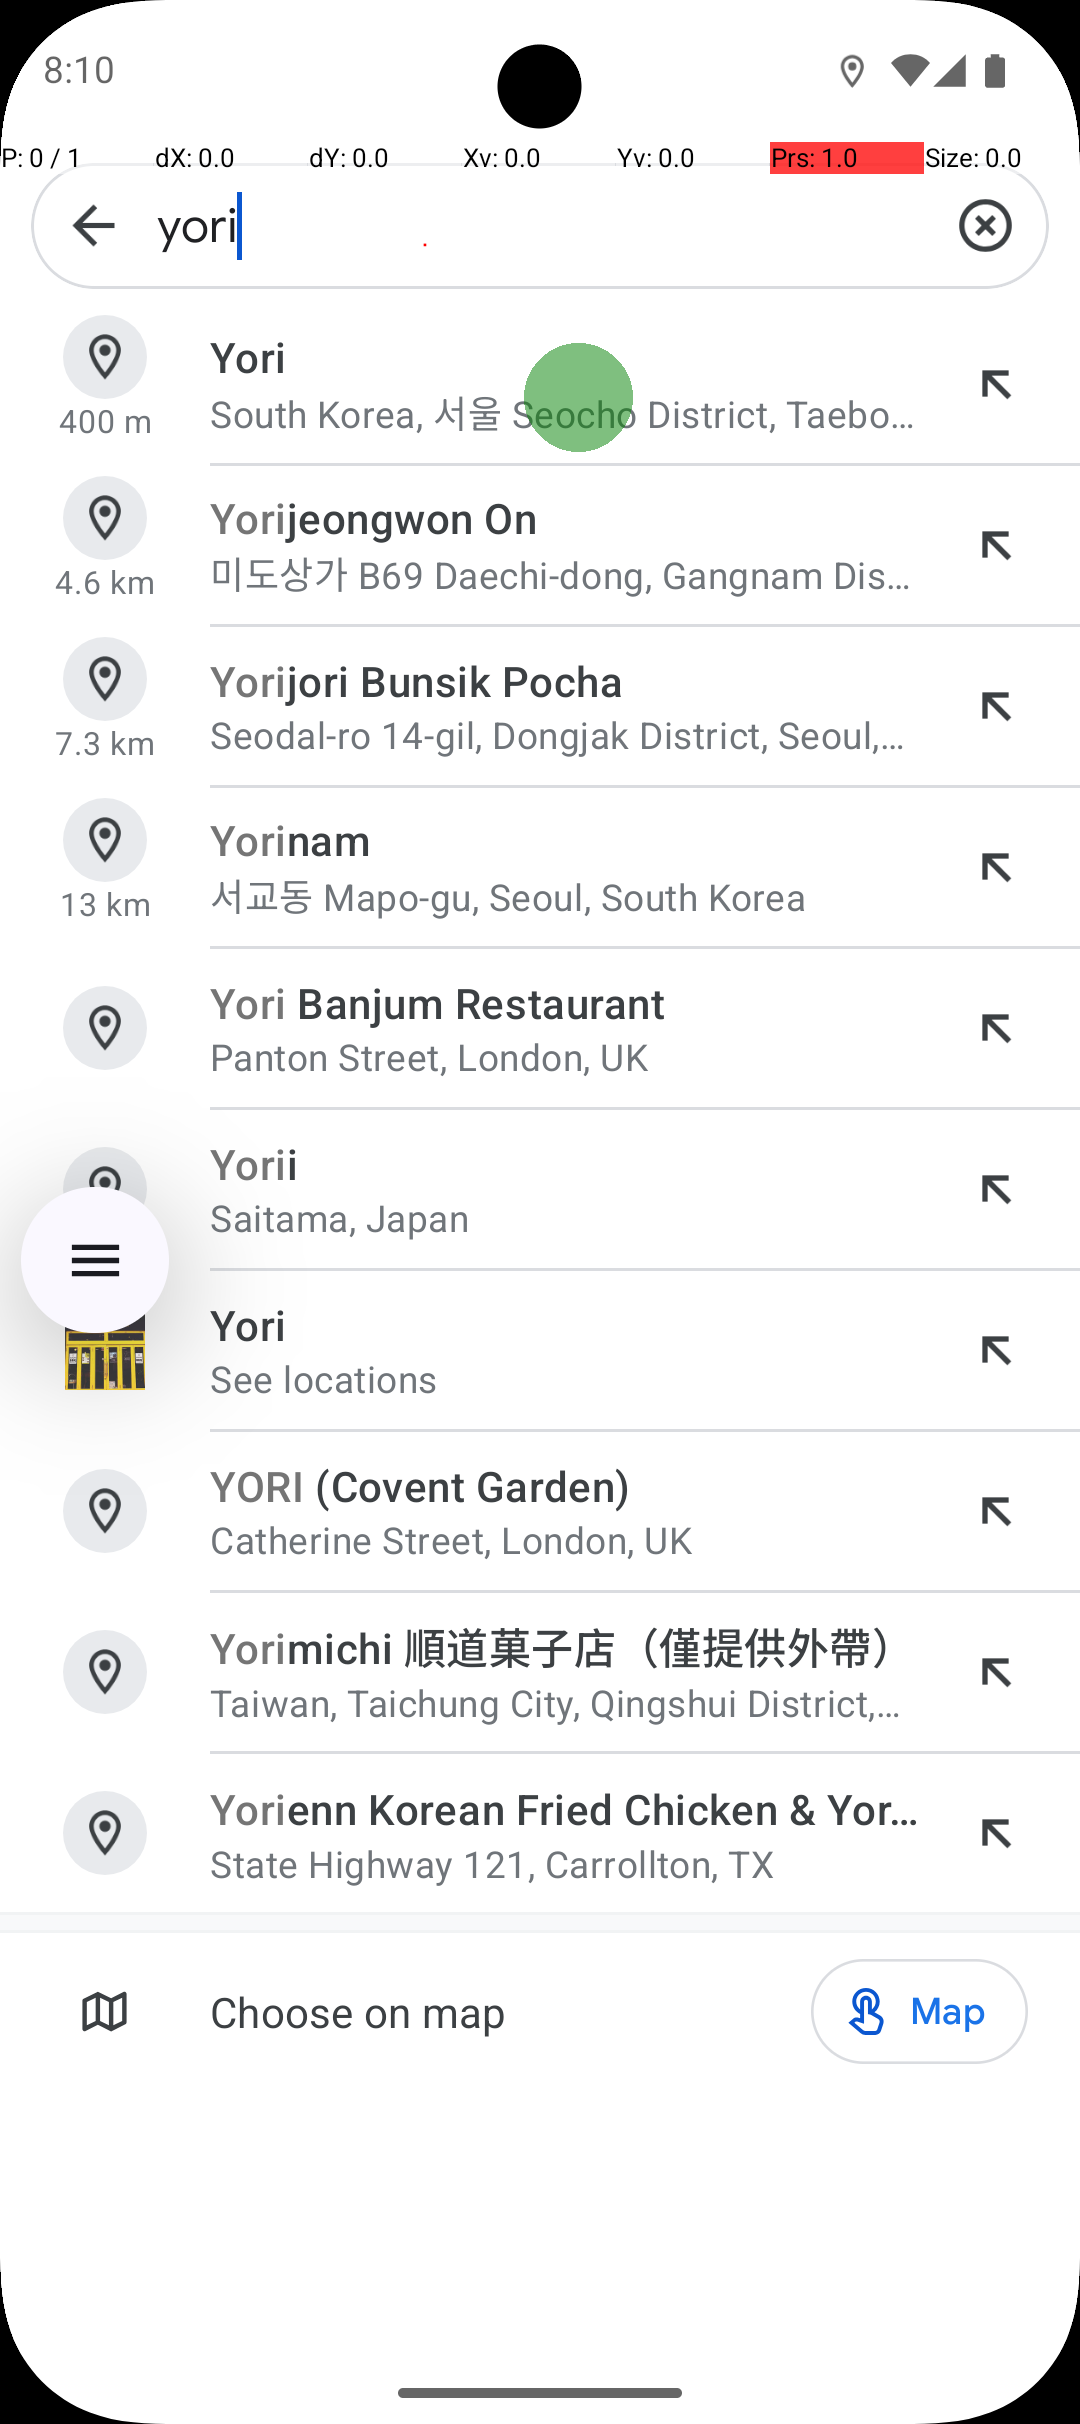

micro_action_plan :  {'name': 'actor_use', 'arguments': {'action': 'click', 'coordinate': [578, 397]}}
verifier output :  To determine if the "Done" action has been completed, let's analyze the information provided:

1. The first screenshot shows a list of search results for "yori," with various locations related to this term.
2. The second screenshot displays detailed information about a location named "Yori" in South Korea, Seocho District, Taebo...
3. There is no visible indication that any "Done" action has been taken or confirmed.

Since there is no evidence of the "Done" action being completed, we can conclude that the action has not been finalized.

<verify>
{
    "action_completed": 0,
    "reason": "The action has not been completed yet."
}
</verify>
['{\n    "action_completed": 0,\n    "reason": "The action has not been completed yet."\n}']
verify :  0
reason :  The action has not been completed yet.
output :  <tool_call>
{"name": "actor_use", "arguments": {"action": "click",

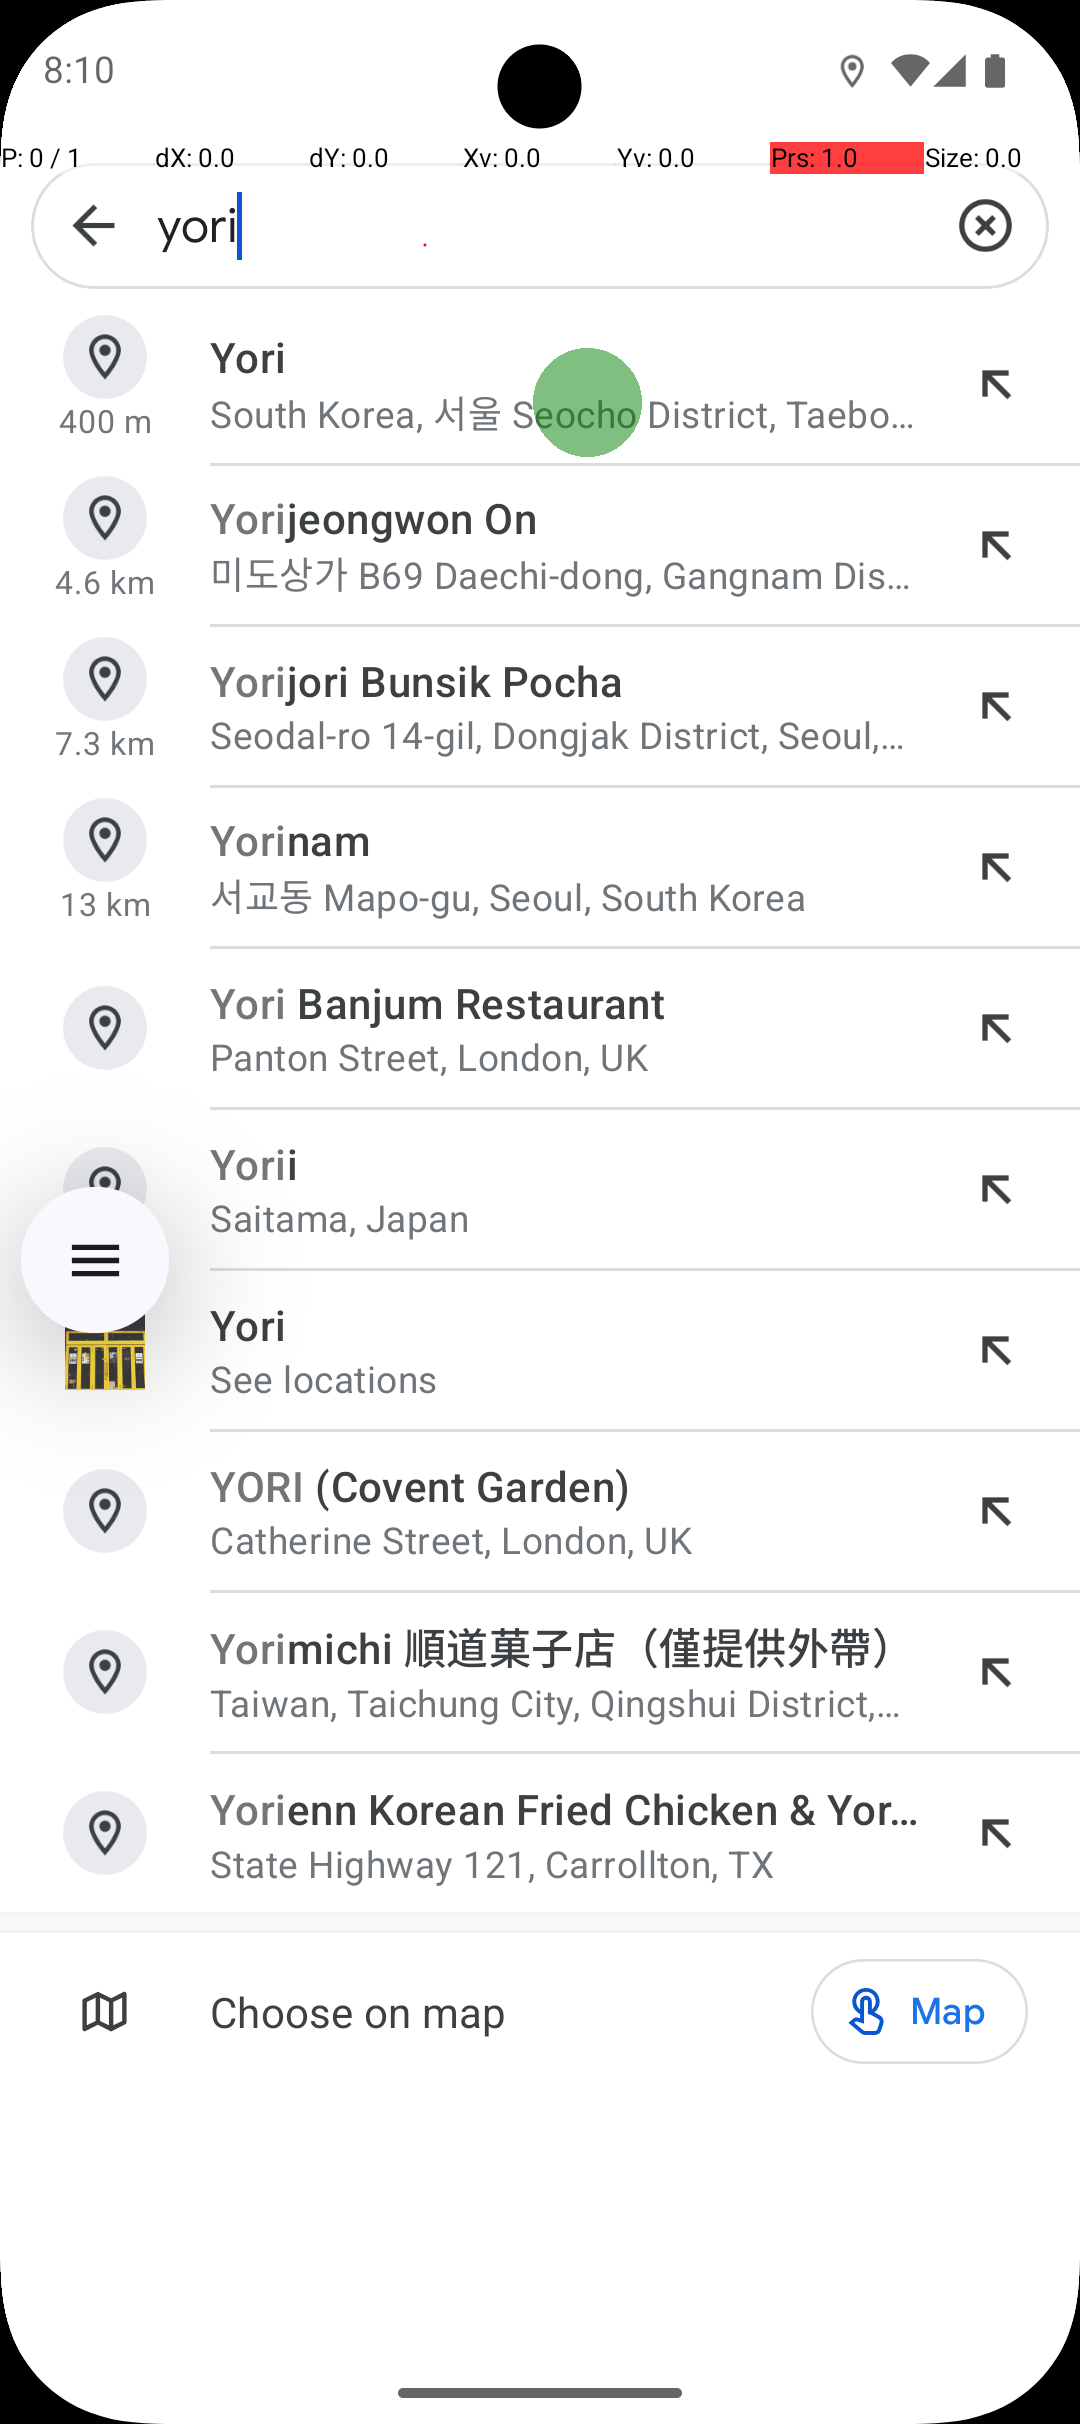

micro_action_plan :  {'name': 'actor_use', 'arguments': {'action': 'click', 'coordinate': [587, 402]}}
verifier output :  To determine if the "Done" action has been completed, let's analyze the information provided:

1. The first screenshot shows a list of search results for "yori," with various locations related to this term.
2. The second screenshot displays detailed information about a location named "Yori" in South Korea, Seocho District, Taebo...
3. There is no visible indication that any "Done" action has been taken or confirmed.

Since there is no evidence of the "Done" action being completed, we can conclude that the action has not been finalized.

<verify>
{
    "action_completed": 0,
    "reason": "The action has not been completed yet."
}
</verify>
['{\n    "action_completed": 0,\n    "reason": "The action has not been completed yet."\n}']
verify :  0
reason :  The action has not been completed yet.
output :  <tool_call>
{"name": "actor_use", "arguments": {"action": "click",

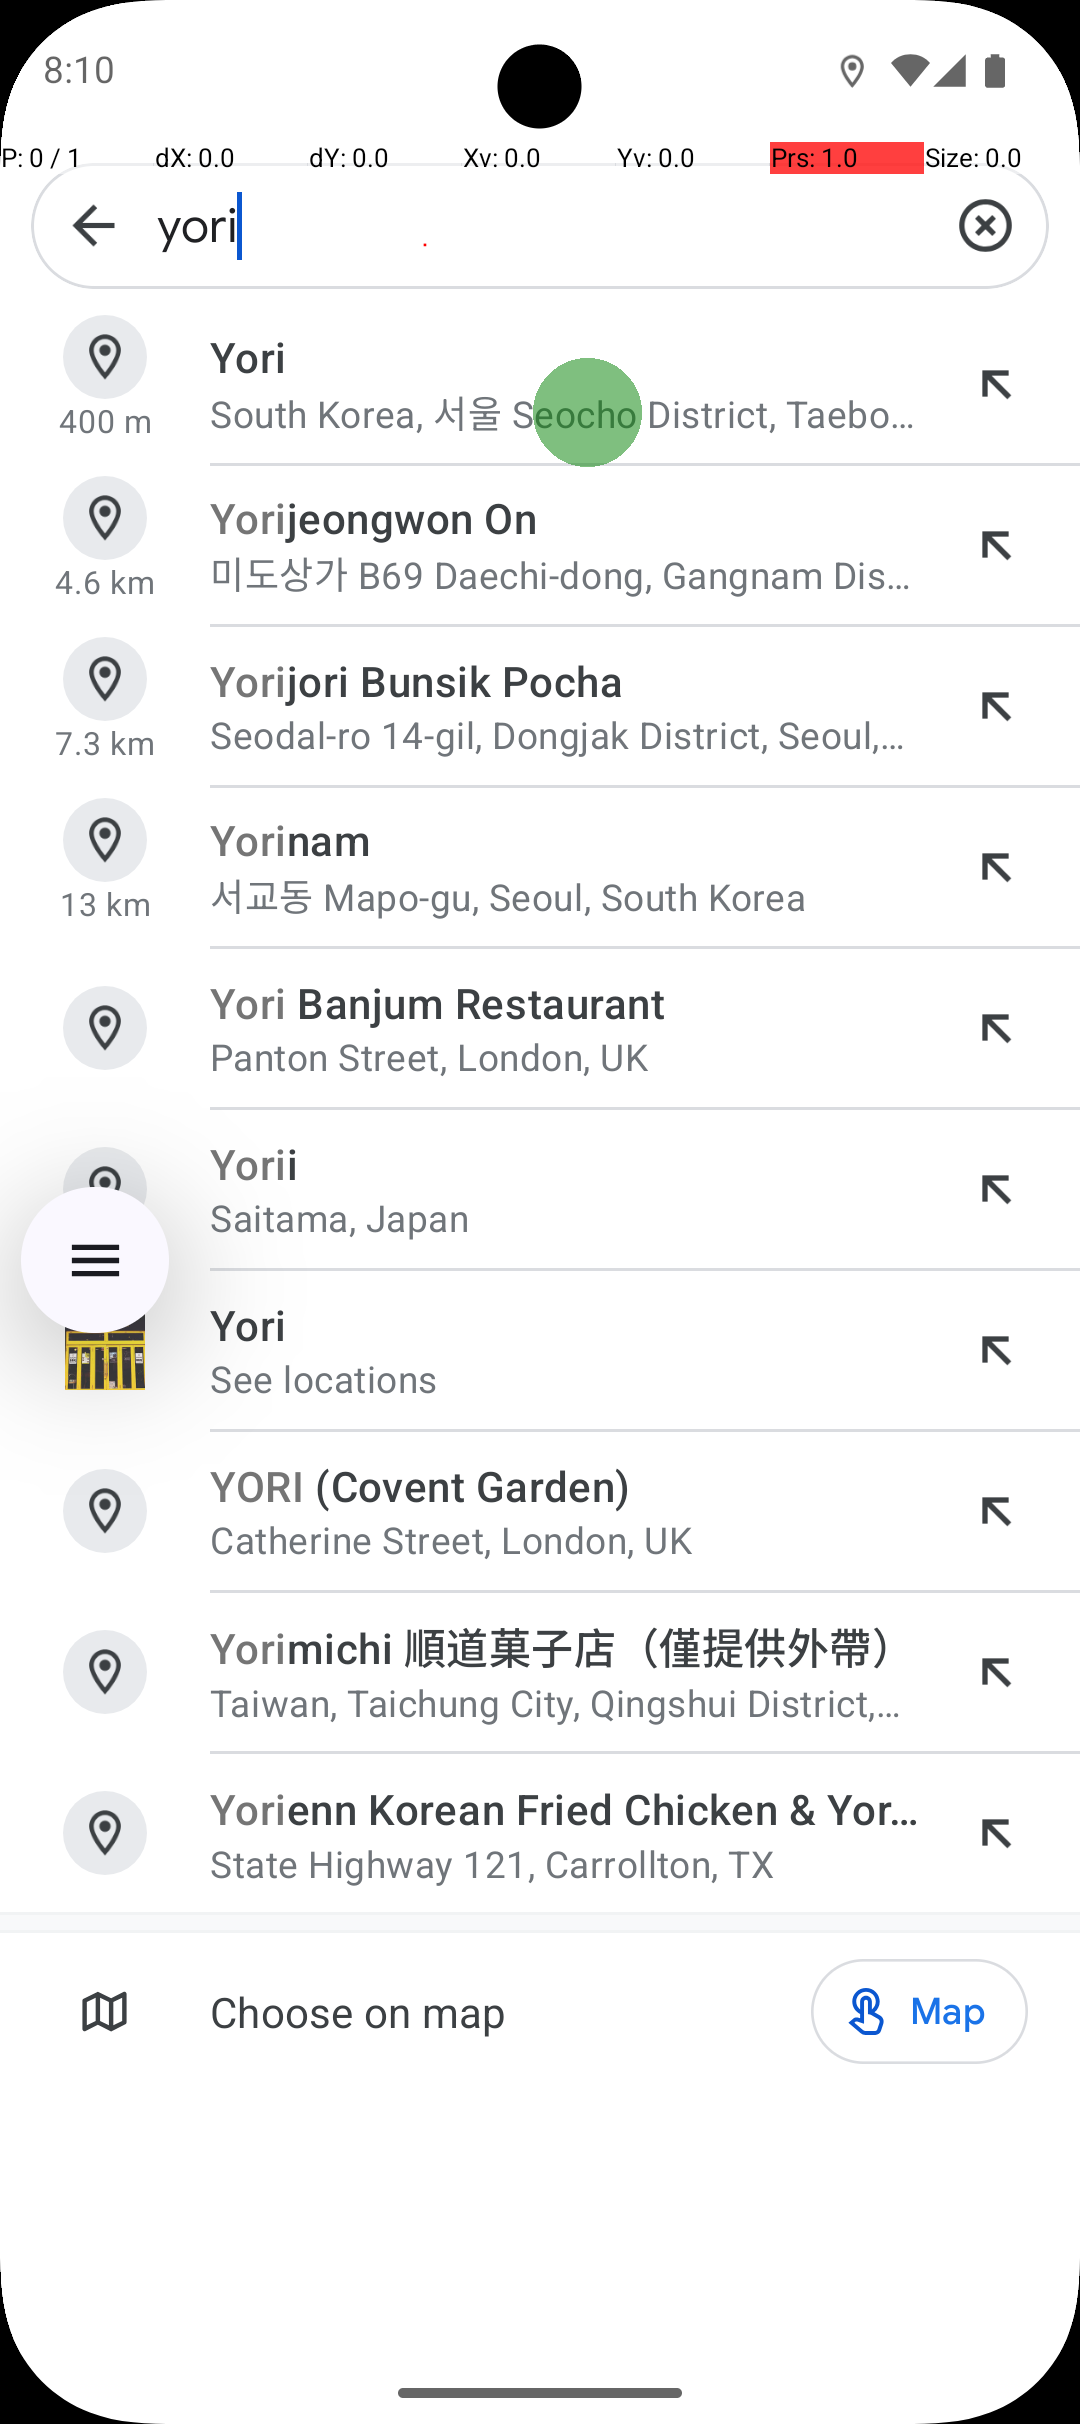

micro_action_plan :  {'name': 'actor_use', 'arguments': {'action': 'click', 'coordinate': [587, 412]}}
verifier output :  To determine if the action of selecting "Done" has been completed, let's analyze the information provided:

1. The first screenshot shows a list of search results for "yori," with various locations listed.
2. The second screenshot displays detailed information about a location named "Yori" in South Korea, Seocho District, Taebo...
3. There is no visible indication that the user has selected "Done" or any confirmation that the action has been completed.

Since there is no evidence of the "Done" action being selected, we can conclude that the action has not been completed yet.

<verify>
{
    "action_completed": 0,
    "reason": "The action has not been completed yet."
}
</verify>
['{\n    "action_completed": 0,\n    "reason": "The action has not been completed yet."\n}']
verify :  0
reason :  The action has not been completed yet.
output :  <tool_call>
{"name": "acto

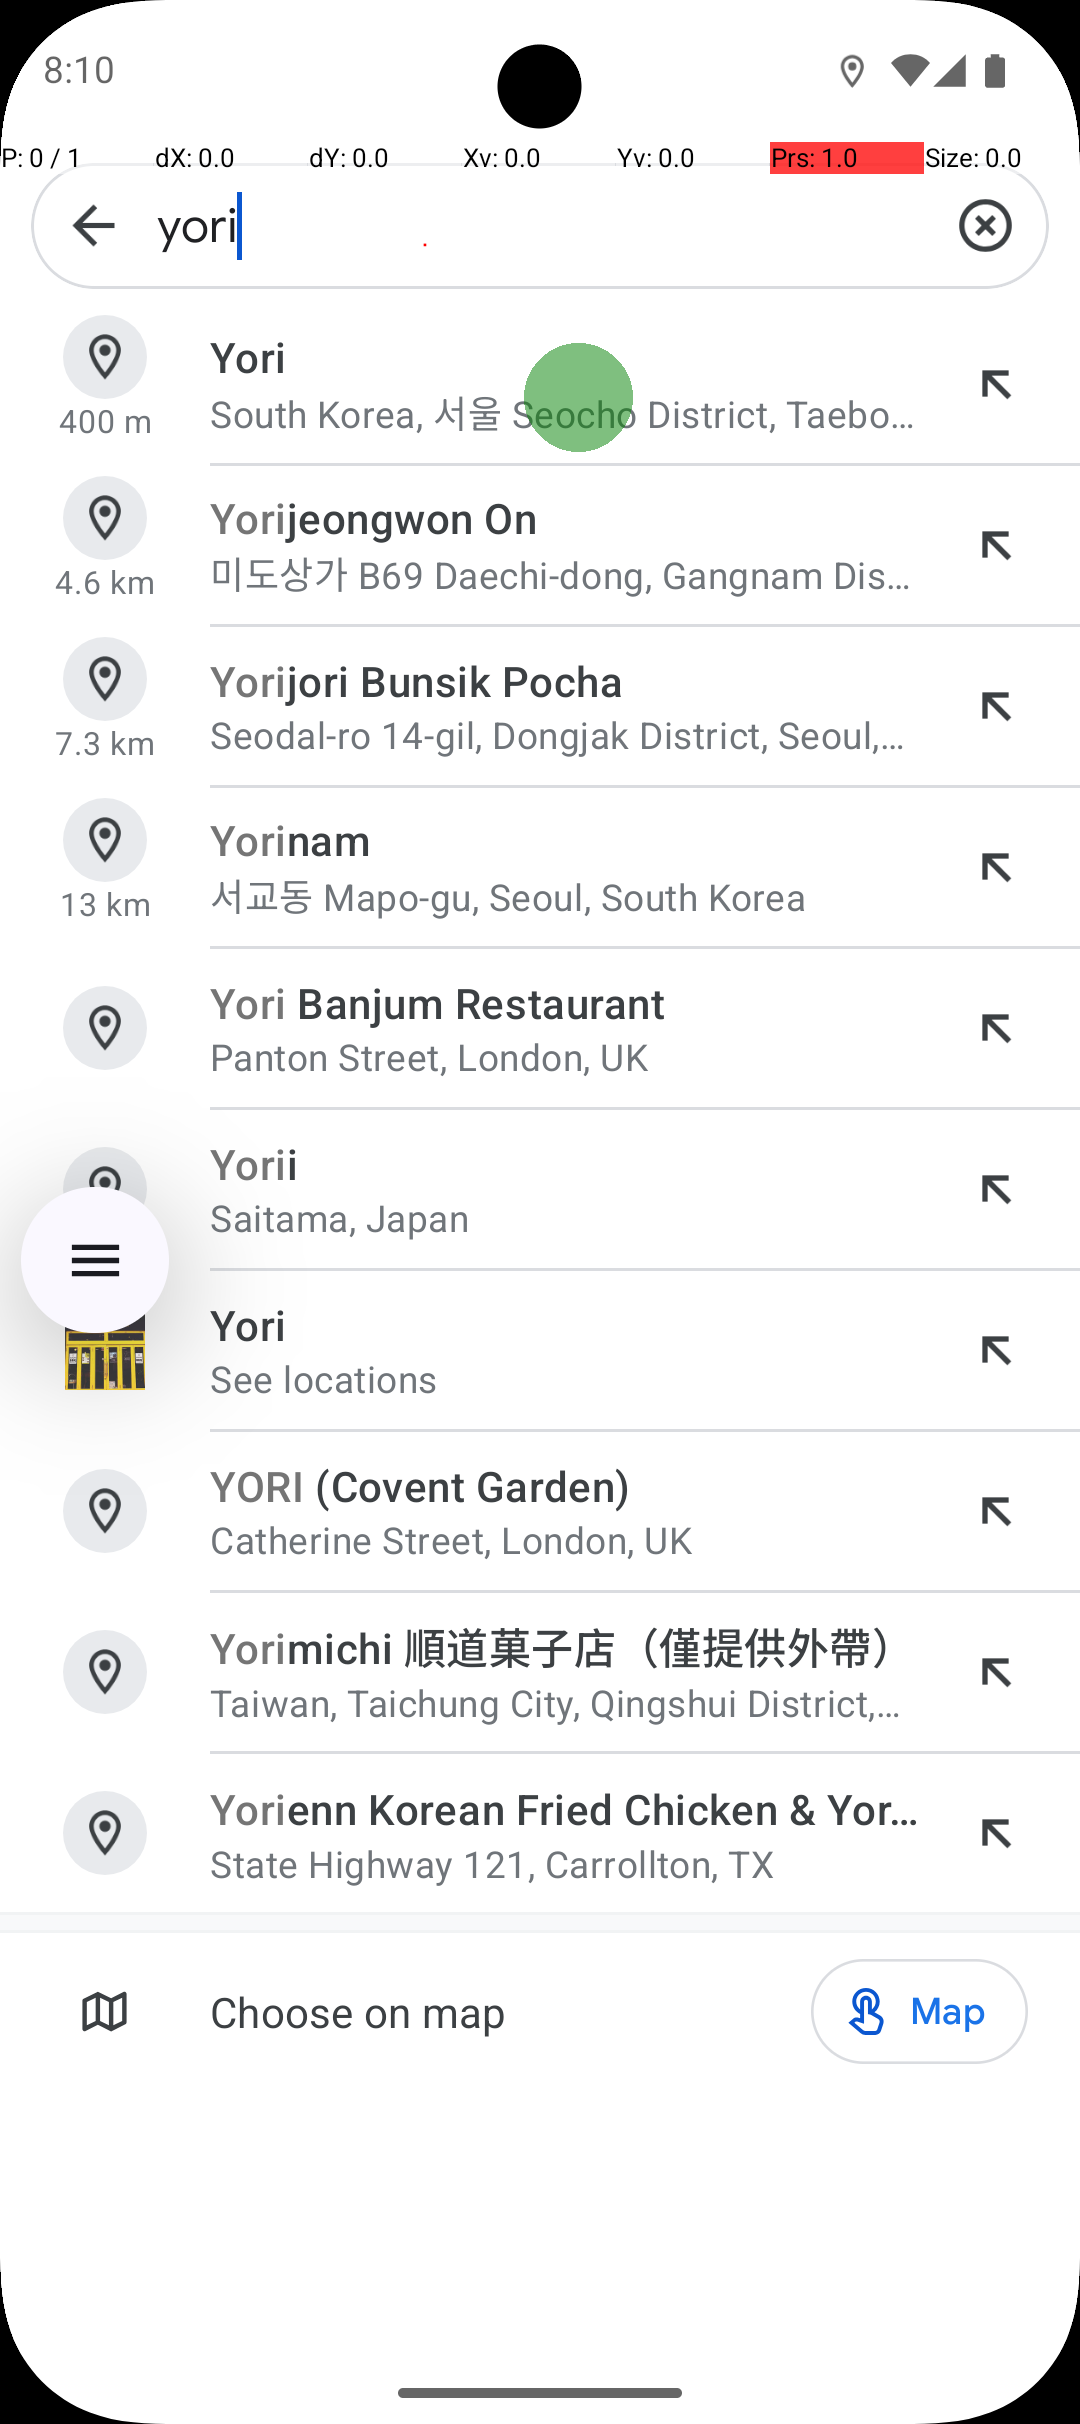

micro_action_plan :  {'name': 'actor_use', 'arguments': {'action': 'click', 'coordinate': [578, 397]}}
verifier output :  To determine if the action of selecting "Done" has been completed, let's analyze the information provided:

1. The first screenshot shows a list of search results for "yori," with various locations related to this term.
2. The second screenshot displays detailed information about a location named "Yori" in South Korea, Seocho District, Taebo...
3. There is no visible indication that the user has selected "Done" or any confirmation that the action has been completed.

Since there is no evidence of the "Done" action being selected, we can conclude that the action has not been completed yet.

<verify>
{
    "action_completed": 0,
    "reason": "The action has not been completed yet."
}
</verify>
['{\n    "action_completed": 0,\n    "reason": "The action has not been completed yet."\n}']
verify :  0
reason :  The action has not been completed yet.
Macro action replan ne

AttributeError: read

In [ ]:
# screenshot = '/home/cyoh/PAV/general/GENERAL-6669219026335480270/GENERAL-6669219026335480270_3.png'  # AITZ
# screenshot = '/home/cyoh/PAV/mcdonalds_images_65_episodes/72/72_3.png'  # McDonalds
screenshot1_path = '/home/cyoh/PAV/google/google_25_2.png'  # GoogleMap
screenshot1 = Image.open(screenshot1_path)

backup_screenshot_path = "curr_screenshot.png"
screenshot1.save(backup_screenshot_path)
initial_screenshot = "curr_screenshot.png"

user_query = 'instruction = "Please add Restaurant Yori to Want to go list."'

previous_macro_action_plan = []
# previous_macro_action_plan = [
#                     "Search 'Namsan Tower'",
#                     "Select direction",
#                 ]

task_completed = False
step = 0    # macro action step
while not task_completed:
    ## Planner Inference
    macro_action_plan = plan.planner(model, processor, initial_screenshot, user_query, previous_macro_action_plan)
    print("macro_action_plan : ", macro_action_plan)

    ## Actor Inference
    macro_mask = [False] * len(macro_action_plan)
    trial = 0   # micro action trial
    backup_screenshot_path = "curr_screenshot.png"
    initial_screenshot = Image.open(initial_screenshot)
    initial_screenshot.save(backup_screenshot_path)
    curr_screenshot = "curr_screenshot.png"
    while not all(macro_mask):
        curr_macro_action = macro_action_plan[step]
        micro_action_plan = act.actor(model, processor, curr_screenshot, curr_macro_action)
        print("micro_action_plan : ", micro_action_plan)

        # Interact with Emulator
        action_type, action_coord = act.to_emulator(micro_action_plan)
        # execute_action(action_type, action_coord)
        # get_screenshot()
        trial += 1
        print("action type : ", action_type, ", action_coord : ", action_coord)

        # Verifier
        next_screenshot = '/home/cyoh/PAV/google/google_25_3.png'

        macro_mask[step] = verify.verifier(model, processor, curr_screenshot, next_screenshot, curr_macro_action)
        # print(macro_mask[step])
        
        if macro_mask[step] == True:
            step += 1
            curr_screenshot = next_screenshot
            previous_macro_action_plan.append(curr_macro_action)
            trial = 0

        next_screenshot = '/home/cyoh/PAV/google/google_25_4.png'

        if trial > 3:
            print("Macro action replan needed!")
            break

    print("End of PAV")
